In [21]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('../data/processed/imdb_processed.csv', index_col=0)
df.head()

,review,sentiment
0,excel cast best aw script inept direct worst s...,negative
1,dreari pointless bit fluff bloodi fluff fluff ...,negative
2,writer director read imagin sinc work must tel...,negative
3,classic b type movi rather wast time see start...,negative
4,short review avoid cost thorough wast 90min en...,negative


In [3]:
X = df['review']
y = df['sentiment']

# build / check model with imbalanced data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

    negative       0.97      0.25      0.39       473
    positive       0.93      1.00      0.97      5028

    accuracy                           0.93      5501
   macro avg       0.95      0.62      0.68      5501
weighted avg       0.94      0.93      0.92      5501



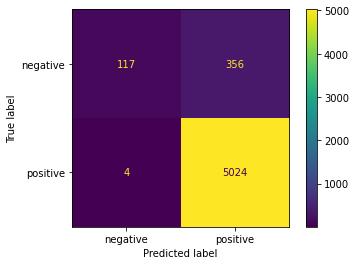

In [5]:
params = {
    "stop_words": None,
    "max_features": None,
    "lowercase": True
}

imbalanced_model = Pipeline(
    [
        ('vectorizer', CountVectorizer(**params)),
        ('model', MultinomialNB())
    ]
)

imbalanced_model.fit(X_train, y_train)
y_pred = imbalanced_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

# prepare imbalanced dataset before building a model - naive bayes

              precision    recall  f1-score   support

    negative       0.69      0.71      0.70       473
    positive       0.97      0.97      0.97      5028

    accuracy                           0.95      5501
   macro avg       0.83      0.84      0.84      5501
weighted avg       0.95      0.95      0.95      5501



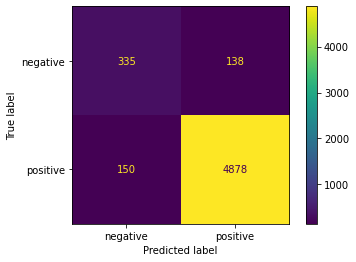

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling  import SMOTE
from imblearn.pipeline import make_pipeline

 
vectorizer = CountVectorizer(**params)
tfidf = TfidfTransformer()
sampler = SMOTE(random_state=42, n_jobs=-1)
nb = MultinomialNB()

balanced_model = make_pipeline(vectorizer, tfidf, sampler, nb)

balanced_model.fit(X_train, y_train)
y_pred_i = balanced_model.predict(X_test)


ConfusionMatrixDisplay.from_predictions(y_test, y_pred_i)
print(classification_report(y_test, y_pred_i))

# balanced dataset with svm model

              precision    recall  f1-score   support

    negative       0.77      0.79      0.78       473
    positive       0.98      0.98      0.98      5028

    accuracy                           0.96      5501
   macro avg       0.88      0.88      0.88      5501
weighted avg       0.96      0.96      0.96      5501



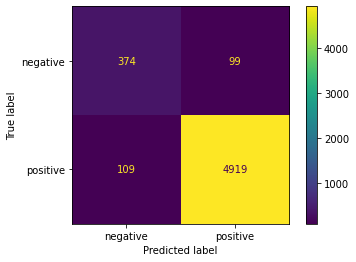

In [8]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)

balanced_model_svm = make_pipeline(vectorizer, tfidf, sampler, svm)

balanced_model_svm.fit(X_train, y_train)
y_pred_svm = balanced_model_svm.predict(X_test)


ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
print(classification_report(y_test, y_pred_svm))

# save model

In [24]:
# with open("../models/model.pkl", "wb") as file:
#         pickle.dump(balanced_model_svm, file)